In [1]:
import findspark
findspark.init()

In [2]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.functions import expr
import pandas as pd
import numpy as np
import happybase

appName= "hive_pyspark"
master= "local[2]"
spark = SparkSession.builder.master(master).appName(appName).enableHiveSupport().getOrCreate()

23/01/12 18:25:03 WARN util.Utils: Your hostname, node1 resolves to a loopback address: 127.0.0.1; using 192.168.137.183 instead (on interface ens3)
23/01/12 18:25:03 WARN util.Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/01/12 18:25:04 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [5]:
df =spark.sql("""
    select count(*) as number, Artists
    from 
        hot100
    group by 
        Artists
    order by 
     number desc
    """).toPandas()

In [6]:
df.head()

,number,Artists
0,1089,"(None, Drake)"
1,954,"(None, Taylor Swift)"
2,823,"(None, Rihanna)"
3,700,"(None, Kenny Chesney)"
4,677,"(None, Maroon 5)"


In [7]:
VM_address = 'vl33.mini.pw.edu.pl'
connection = happybase.Connection(VM_address, port=9090)

In [8]:
Spotify = connection.table('RankingData')

In [10]:
!pip3 install hbspark

Defaulting to user installation because normal site-packages is not writeable


In [61]:
import hbspark
from pyspark.sql import SparkSession
spark_session = SparkSession.builder.appName('Reading HBase').master('local[2]').getOrCreate()
hbspark.connect('127.0.0.1', spark_session)
Ranking_df = hbspark.table("table3").scan().toPandas()

In [62]:
Ranking_df

,RankingData:ranking,RankingData:time,RankingData:title,rowkey,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type
0,28,18:01:05,OMG,00614bdcb1ca3635f92aabde9548fee4bdb78d5f670f55...,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,028c7c56ce6649476cf8971ef2b83ec2d66fa97bf31527...,album,167303,false,[MapRecord[{element=https://api.spotify.com/v1...,93,2022-05-20,day,track,spotify:track:4Dvkj6JhhA12EX05fT7y2e,https://open.spotify.com/album/5r36AJ6VOJtp00o...,13,album
2,None,None,None,06a1beecfe1b48384c1c1eda273bcc62d68f8942bb6a1b...,single,175238,false,[MapRecord[{element=https://api.spotify.com/v1...,98,2022-08-26,day,track,spotify:track:4uUG5RXrOk84mYEfFvj3cK,https://open.spotify.com/album/7M842DMhYVALrXs...,2,album
3,29,18:01:05,I Wanna Be Yours,0725b3ea4d2d08d85bed67d6e9f93a31d7d8727547afb5...,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,084cf09efa1d1ad9c8c64fc8e38fd28fcf1a416cdfbb5c...,album,156787,false,[MapRecord[{element=https://api.spotify.com/v1...,88,2022-09-09,day,track,spotify:track:53tfEupEzQRtVFOeZvk7xq,https://open.spotify.com/album/3zbiiu3JTibw0es...,24,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,18:01:05,Starboy,f262c1884dbaf2bb332b128faee2c410492424ded7eff1...,None,None,None,None,None,None,None,None,None,None,None,None
96,44,18:01:05,STAY (with Justin Bieber),f339604a6a8bbfec894264f746fa42efc05630d1e405ec...,None,None,None,None,None,None,None,None,None,None,None,None
97,41,18:01:05,Heat Waves,f689ac93e9253a9e9a1ced3b3db0bc45003cdf53ef4232...,None,None,None,None,None,None,None,None,None,None,None,None
98,1,18:01:05,Kill Bill,fbb62c325b8432a6c358036be70e84e788da04e36c29fa...,None,None,None,None,None,None,None,None,None,None,None,None


In [15]:
df2 = spark.sql("""
    select * from hot100
    """).toPandas()

In [42]:
df2

,Artists,Name,Rank,Peak,Weeks,Week,Created
0,"(None, Lil Nas,)","(None, None, None, Old Town Road)",1,"(1, None)","(7, None)",2019-07-06,"April 5, 2019"
1,"(None, Shawn Mendes, Camila Cabello)","(None, None, None, Senorita)",2,"(None, NA)","(None, NA)",2019-07-06,"June 21, 2019"
2,"(None, Billie Eilish)","(None, None, None, Bad Guy)",3,"(2, None)","(13, None)",2019-07-06,"March 29, 2019"
3,"(None, Khalid)","(None, None, None, Talk)",4,"(3, None)","(20, None)",2019-07-06,"February 7, 2019"
4,"(None, Ed Sheeran, Justin Bieber)","(None, None, None, I Don't Care)",5,"(2, None)","(7, None)",2019-07-06,"May 10, 2019"
...,...,...,...,...,...,...,...
97220,"(None, Vitamin C)","(None, None, None, Smile)",95,"(None, NA)","(None, NA)",1999-07-12,None
97221,"(None, Collective Soul)","(None, None, None, Heavy)",96,"(73, None)","(20, None)",1999-07-12,None
97222,"(None, Mary Chapin Carpenter)","(None, None, None, Almost Home)",97,"(None, NA)","(None, NA)",1999-07-12,None
97223,"(None, Q)","(None, None, None, Vivrant Thing)",98,"(None, NA)","(None, NA)",1999-07-12,None


In [23]:
# Viz 1

In [16]:

df3 =spark.sql("""
    select Name, Artists, count(*) as number
    from 
        hot100
    group by 
        Name, Artists
    order by 
     number desc
    """).toPandas()

In [17]:
df3

,Name,Artists,number
0,"(None, None, None, Radioactive)","(None, Imagine Dragons)",87
1,"(None, None, None, Sail)","(None, AWOLNATION)",79
2,"(None, None, None, I'm Yours)","(None, Jason Mraz)",76
3,"(None, None, None, Counting Stars)","(None, OneRepublic)",68
4,"(None, None, None, Rolling In The Deep)","(None, Adele)",65
...,...,...,...
7208,"(None, None, None, Yuck!)","(None, 2 Chainz)",1
7209,"(None, None, None, Valerie)","(None, Glee Cast)",1
7210,"(None, None, None, I'm Me)","(None, Lil Wayne)",1
7211,"(None, None, None, Saving Grace)","(None, Tom Petty)",1


In [18]:
Song_names = [i.member3 for i in df3.Name]

In [19]:
lap_songs = list(set(Song_names) & set(Ranking_df['RankingData:title']))

In [21]:
S_frames = [None] * len(lap_songs)
for i, song in enumerate(lap_songs):
    S_frames[i] = spark.sql(f"""
    select *
    from 
        hot100
    where cast(Name as string) Like "%{song}%"
    """).toPandas()

In [22]:
for i in S_frames:
    i.Week = pd.to_datetime(i.Week)

In [23]:
S2_frames = [None] * len(lap_songs)
for i, song in enumerate(lap_songs):
    S2_frames[i] = Ranking_df.loc[Ranking_df['RankingData:title'] == song,:].reset_index()


In [24]:
S2_frames[0].loc[0,'RankingData:ranking']

'18'

In [27]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 9.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 8.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [129]:
# Plot

In [28]:
import matplotlib.pyplot as plt

In [29]:
S2_frames[1]

,index,RankingData:ranking,RankingData:time,RankingData:title,rowkey,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type
0,55,27,18:01:05,Made You Look,96cdb3dee60b8aa8a58afce0ac5b956dc28704f4563b8b...,None,None,None,None,None,None,None,None,None,None,None,None


In [35]:
print(lap_songs)

['Sure Thing', 'Made You Look', 'Miss You', None, 'Here With Me', 'Die For You', 'Starboy', 'Sweater Weather', 'OMG', 'Mockingbird']


In [30]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2023-01-12


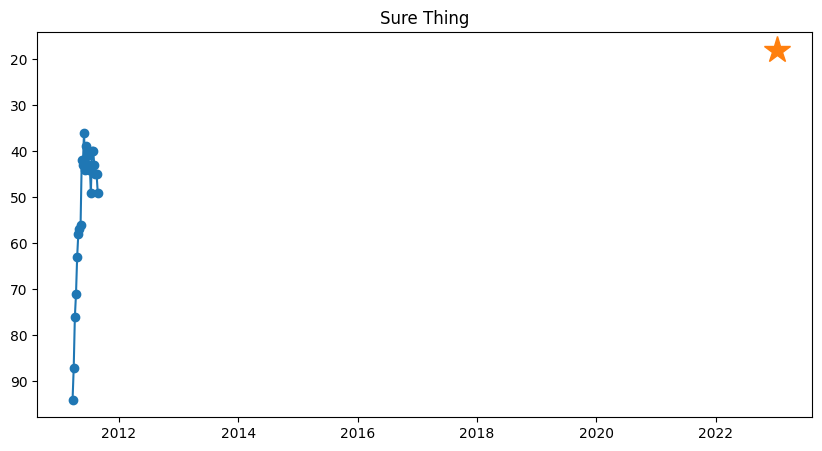

In [31]:
i = 0

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.gca().invert_yaxis()
plt.title(lap_songs[i])
plt.plot('Week', 'Rank', data=S_frames[i], linestyle='-', marker='o', )
plt.plot(today, int(S2_frames[i].loc[0,'RankingData:ranking']), marker='*', ls='none', ms=20)
plt.savefig(f'plot_{lap_songs[i]}.png')

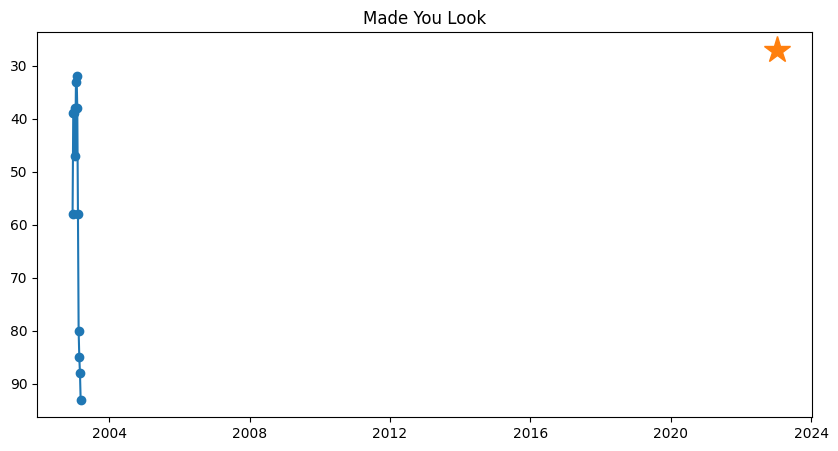

In [32]:
i = 1

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.gca().invert_yaxis()
plt.title(lap_songs[i])
plt.plot('Week', 'Rank', data=S_frames[i], linestyle='-', marker='o', )
plt.plot(today, int(S2_frames[i].loc[0,'RankingData:ranking']), marker='*', ls='none', ms=20)
plt.show()

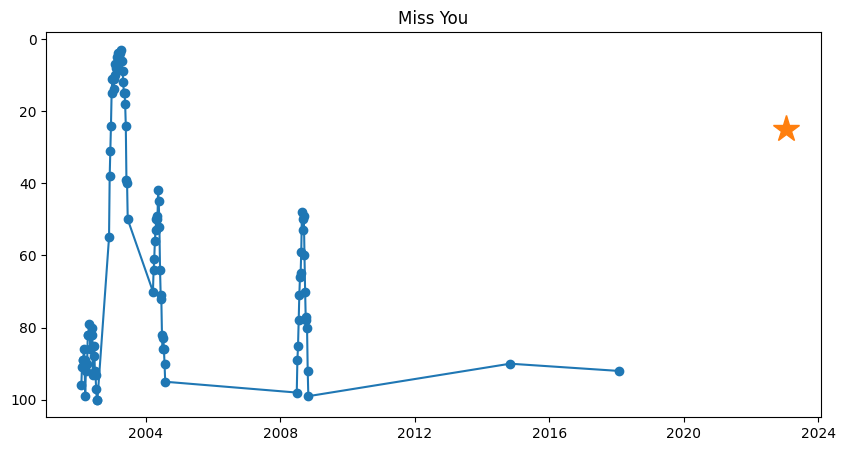

In [33]:
i = 2

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.gca().invert_yaxis()
plt.title(lap_songs[i])
plt.plot('Week', 'Rank', data=S_frames[i], linestyle='-', marker='o', )
plt.plot(today, int(S2_frames[i].loc[0,'RankingData:ranking']), marker='*', ls='none', ms=20)
plt.show()

KeyError: 0

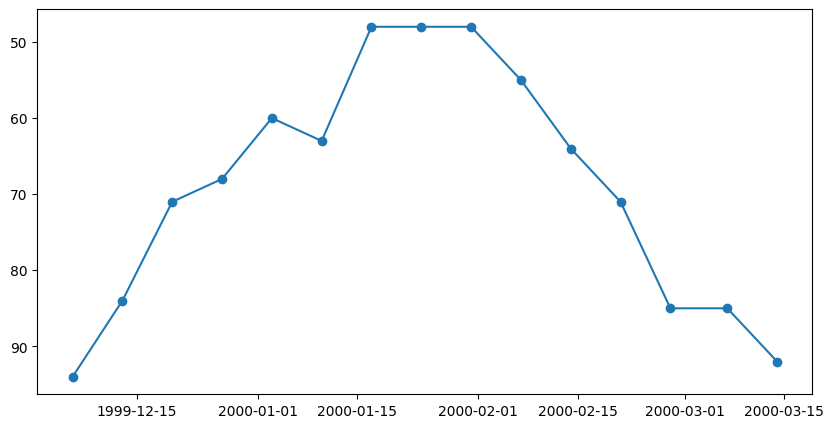

In [36]:
i = 3

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.gca().invert_yaxis()
plt.title(lap_songs[i])
plt.plot('Week', 'Rank', data=S_frames[i], linestyle='-', marker='o', )
plt.plot(today, int(S2_frames[i].loc[0,'RankingData:ranking']), marker='*', ls='none', ms=20)
plt.show()

In [37]:
Ranking_df['SongDetails:release_date'] = pd.to_datetime(Ranking_df['SongDetails:release_date'])

In [38]:
Ranking_df['SongDetails:release_date'] < '2020-01-01'

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99     True
Name: SongDetails:release_date, Length: 100, dtype: bool

In [39]:
Real_ranking = Ranking_df.loc[Ranking_df['SongDetails:release_date'] < '2020-01-01',:]

In [40]:
Real_ranking

,RankingData:ranking,RankingData:time,RankingData:title,rowkey,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type
12,None,None,None,1651ad39a0b6844640dfcc764c9b09c9c57b1138cdee38...,album,184613,false,[MapRecord[{element=https://api.spotify.com/v1...,95,2019-10-04,day,track,spotify:track:5IgjP7X4th6nMNDh4akUHb,https://open.spotify.com/album/3okhA6w5uau6ZNh...,42,album
13,None,None,None,16867295501a1d8dba926975d61ff382acf9beb1bd5b15...,album,230453,false,[MapRecord[{element=https://api.spotify.com/v1...,92,2016-11-25,day,track,spotify:track:7MXVkk9YMctZqd1Srtv4MB,https://open.spotify.com/album/2ODvWsOgouMbaA5...,18,album
17,None,None,None,1da7d667807c258e2e3a8fb53c5d9cedfd0be5535dae19...,album,244760,false,[MapRecord[{element=https://api.spotify.com/v1...,82,2011-01-01,day,track,spotify:track:11BKm0j4eYoCPPpCONAVwA,https://open.spotify.com/album/5maeycU97NHBgwR...,22,album
36,None,None,None,5ae4ed3cfcd95ef7b6c413967e7587cc3931df75078bf6...,album,260253,false,[MapRecord[{element=https://api.spotify.com/v1...,90,2016-11-24,day,track,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,https://open.spotify.com/album/4AdZV63ycxFLF6H...,18,album
65,None,None,None,a3c73790b9e738c47962d0e91e0684aae8178556f238ba...,album,250760,false,[MapRecord[{element=https://api.spotify.com/v1...,94,2004-11-12,day,track,spotify:track:561jH07mF1jHuk7KlaeF0s,https://open.spotify.com/album/1kTlYbs28MXw7hw...,23,album
66,None,None,None,a6ce3b4e2c9bd2e5271e8db6f9085b873d80be0b57ac28...,album,240400,false,[MapRecord[{element=https://api.spotify.com/v1...,93,2013-04-19,day,track,spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,https://open.spotify.com/album/4xkM0BwLM9H2IUc...,11,album
79,None,None,None,ccd4b89b1f64b27d846293a94af5e85e6dd2aad22e713e...,album,244360,false,[MapRecord[{element=https://api.spotify.com/v1...,67,2013-06-17,day,track,spotify:track:7jtQIBanIiJOMS6RyCx6jZ,https://open.spotify.com/album/0KGBW1MQtC2aFPC...,10,album
80,None,None,None,ce79faca1cd825cdded65af7b2042554c7491d925a4629...,album,195373,false,[MapRecord[{element=https://api.spotify.com/v1...,91,2010-11-26,day,track,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://open.spotify.com/album/493HYe7N5pleudE...,13,album
99,None,None,None,ff75bb217ad1ca76b06fa29332096d525dff6af7918e4a...,album,183956,false,[MapRecord[{element=https://api.spotify.com/v1...,94,2013-09-09,day,track,spotify:track:5XeFesFbtLpXzIVDNQP22n,https://open.spotify.com/album/78bpIziExqiI9qz...,12,album


In [41]:
Real_songs = []
for i in range(len(Song_names)):
    if (Song_names):
        Real_songs.append(Song_names[i])

In [42]:
'Born This Way' in Real_ranking['RankingData:title']

False

In [45]:
str(Real_ranking['RankingData:title'])

'12    None\n13    None\n17    None\n36    None\n65    None\n66    None\n79    None\n80    None\n99    None\nName: RankingData:title, dtype: object'

In [84]:
import hbspark
from pyspark.sql import SparkSession
spark_session = SparkSession.builder.appName('Reading HBase').master('local[2]').getOrCreate()
hbspark.connect('127.0.0.1', spark_session)
Ranking_df = hbspark.table("table3").scan().toPandas()
Ranking_df

,RankingData:ranking,RankingData:time,RankingData:title,rowkey,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type
0,28,18:01:05,OMG,00614bdcb1ca3635f92aabde9548fee4bdb78d5f670f55...,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,028c7c56ce6649476cf8971ef2b83ec2d66fa97bf31527...,album,167303,false,[MapRecord[{element=https://api.spotify.com/v1...,93,2022-05-20,day,track,spotify:track:4Dvkj6JhhA12EX05fT7y2e,https://open.spotify.com/album/5r36AJ6VOJtp00o...,13,album
2,None,None,None,06a1beecfe1b48384c1c1eda273bcc62d68f8942bb6a1b...,single,175238,false,[MapRecord[{element=https://api.spotify.com/v1...,98,2022-08-26,day,track,spotify:track:4uUG5RXrOk84mYEfFvj3cK,https://open.spotify.com/album/7M842DMhYVALrXs...,2,album
3,29,18:01:05,I Wanna Be Yours,0725b3ea4d2d08d85bed67d6e9f93a31d7d8727547afb5...,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,084cf09efa1d1ad9c8c64fc8e38fd28fcf1a416cdfbb5c...,album,156787,false,[MapRecord[{element=https://api.spotify.com/v1...,88,2022-09-09,day,track,spotify:track:53tfEupEzQRtVFOeZvk7xq,https://open.spotify.com/album/3zbiiu3JTibw0es...,24,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,18:01:05,Starboy,f262c1884dbaf2bb332b128faee2c410492424ded7eff1...,None,None,None,None,None,None,None,None,None,None,None,None
96,44,18:01:05,STAY (with Justin Bieber),f339604a6a8bbfec894264f746fa42efc05630d1e405ec...,None,None,None,None,None,None,None,None,None,None,None,None
97,41,18:01:05,Heat Waves,f689ac93e9253a9e9a1ced3b3db0bc45003cdf53ef4232...,None,None,None,None,None,None,None,None,None,None,None,None
98,1,18:01:05,Kill Bill,fbb62c325b8432a6c358036be70e84e788da04e36c29fa...,None,None,None,None,None,None,None,None,None,None,None,None


In [82]:
Ranking_df = Ranking_df.dropna(subset=['SongDetails:duration_ms','RankingData:ranking'])

In [83]:
Ranking_df

,RankingData:ranking,RankingData:time,RankingData:title,rowkey,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type


In [74]:
Ranking_df['time'] = [(int(i)/1000) for i in Ranking_df['SongDetails:duration_ms']]
Ranking_df['pop'] = [int(i) for i in Ranking_df['SongDetails:popularity']]
Ranking_df['ranking'] = [int(i) for i in Ranking_df['RankingData:ranking']]
Ranking_time = Ranking_df.groupby('ranking').agg({'time':np.mean,'pop':np.mean})

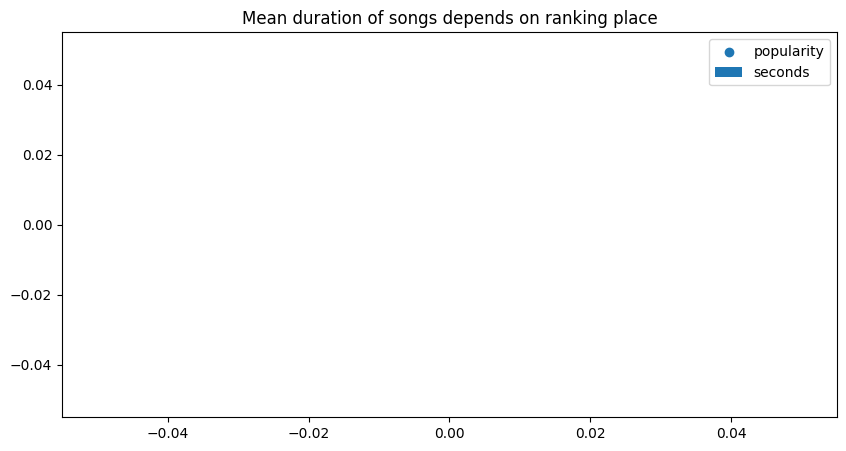

In [75]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

 

plt.bar(Ranking_time.index, Ranking_time.time, color='#1DB954', label = 'seconds')
plt.scatter(x = Ranking_time.index, y = Ranking_time['pop'], label = 'popularity')
plt.title('Mean duration of songs depends on ranking place')
plt.legend()


plt.show()